## **1. Import the Essentials**
***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

***

## **2. Mount Google Drive and Load Data**
***

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
supply_chain_path = '/content/drive/My Drive/supply_chain'
print(os.listdir(supply_chain_path))

['DescriptionDataCoSupplyChain.csv', 'tokenized_access_logs.csv', 'DataCoSupplyChainDataset.csv']


In [6]:
df = pd.read_csv('/content/drive/My Drive/supply_chain/DataCoSupplyChainDataset.csv', encoding='latin-1')

***

## **3. Quick Data Preview**
***

In [7]:
# Display the first few rows of the DataFrame to preview the data
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


***

In [8]:
# Display the last few rows of the DataFrame to preview the most recent data entries
df.tail()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
180514,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
180515,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
180516,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class
180517,PAYMENT,3,4,186.229996,387.980011,Advance shipping,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/18/2016 20:18,Standard Class
180518,PAYMENT,4,4,168.949997,383.980011,Shipping on time,0,45,Fishing,Caguas,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 18:54,Standard Class


***
> By looking at the first and last few rows, we can see that the data is organized as expected. Each row represents a single order item, and nothing looks out of place or weird.
***

In [9]:
# Show the dimensions of the DataFrame (number of rows and columns)
df.shape

(180519, 53)

***
> We’re working with a big dataset – over 180,000 rows and 53 columns. This means we have a lot of information about different orders, products, and customers.
***

In [10]:
# Display the list of column names in the DataFrame
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

***

In [11]:
# Display a concise summary of the DataFrame including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

***
> Most columns have the type of information we’d expect (like numbers, names, and dates). Some columns store dates as plain text instead of proper date types, which we’ll want to fix so we can work with date-based questions (like trends over time).
***

## **4. Basic Statistics**
***

In [12]:
# Display summary statistics for all numerical columns in the DataFrame
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,0.0,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,2.127638,203.772096,183.107609,21.974989,55426.132327,692.509764,31.851451,NaN,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,1.453451,132.273077,120.043670,104.433526,31919.279101,336.446807,15.640064,NaN,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,1.000000,9.990000,7.490000,-4274.979980,1040.000000,19.000000,2.000000,NaN,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,1.000000,119.980003,104.379997,7.000000,23464.000000,403.000000,18.000000,NaN,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,1.000000,199.919998,163.990005,31.520000,59405.000000,627.000000,29.000000,NaN,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,3.000000,299.950012,247.399994,64.800003,90008.000000,1004.000000,45.000000,NaN,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,5.000000,1999.989990,1939.989990,911.799988,99301.000000,1363.000000,76.000000,NaN,1999.989990,0.0


***

## **5. Missing Data Check**
***

In [13]:
df.isnull().sum().sort_values(ascending=False)

,0
Product Description,180519
Order Zipcode,155679
Customer Lname,8
Customer Zipcode,3
Days for shipment (scheduled),0
Sales per customer,0
Benefit per order,0
Delivery Status,0
Late_delivery_risk,0
Customer City,0


***

## **6. Visualize Missing Data**
***

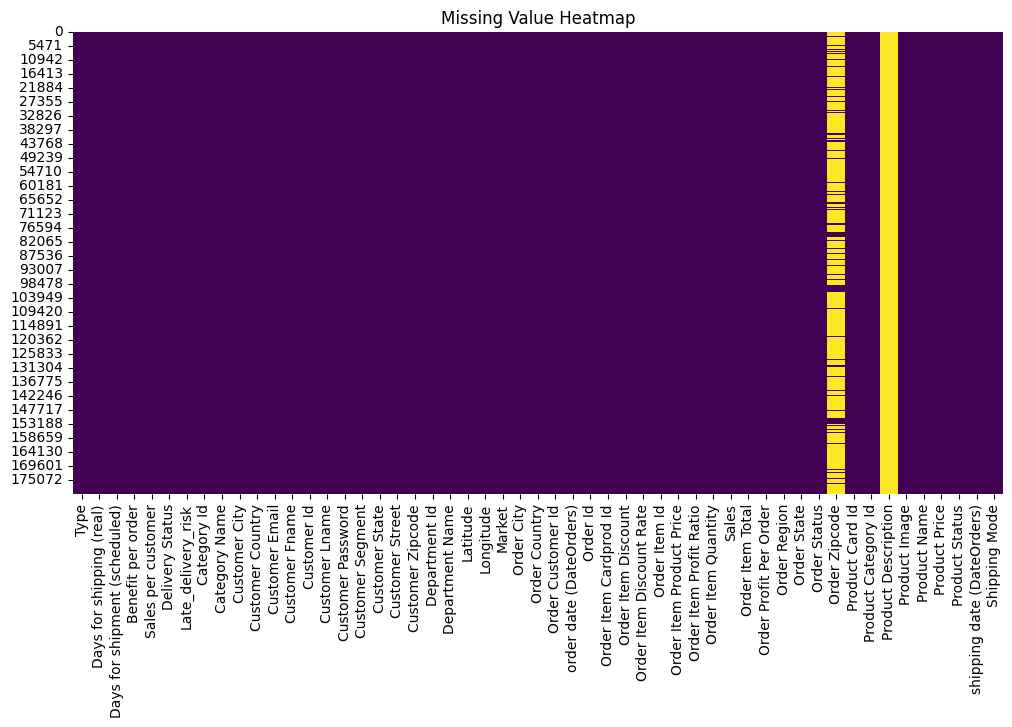

In [14]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.show()

***
> - The “Product Description” column is completely empty, so we can remove it.
- The “Order Zipcode” column is mostly empty and probably isn’t needed.
- A few customer names and zip codes are missing, but this won’t really affect our analysis.
***

## **7. Check for Duplicates**
***

In [15]:
df.duplicated().sum()

np.int64(0)

***
> There are no duplicate rows, so every order/item is unique—perfect for analysis!
***

## **8. Unique Values per Column**
***

In [17]:
df.nunique().sort_values(ascending=False)

,0
Order Item Id,180519
order date (DateOrders),65752
Order Id,65752
shipping date (DateOrders),63701
Benefit per order,21998
Order Profit Per Order,21998
Customer Id,20652
Order Customer Id,20652
Latitude,11250
Customer Street,7458


***
> Some columns, like Order ID and Customer ID, have different values in every row, which is great for keeping track of specific orders or people. But some columns, like “Customer Email” or “Product Status”, have the same value everywhere, so these aren’t helpful and can be removed.
***

## **9. Outliers**

***

Column: Benefit per order | Outliers: 18942


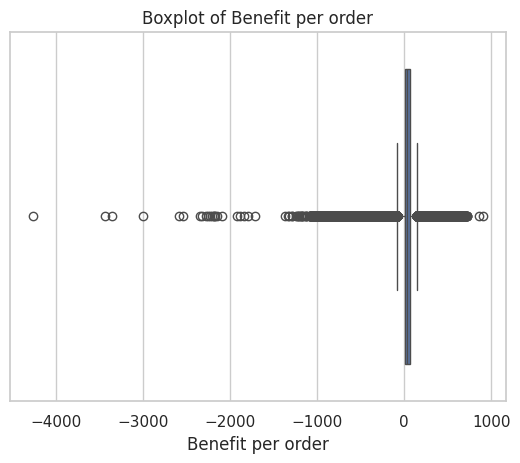

Column: Sales per customer | Outliers: 1943


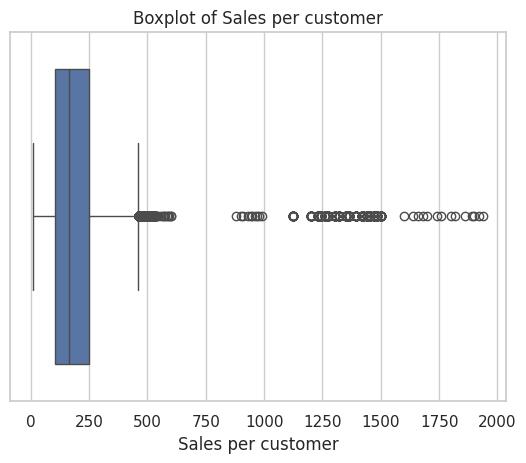

Column: Order Item Total | Outliers: 1943


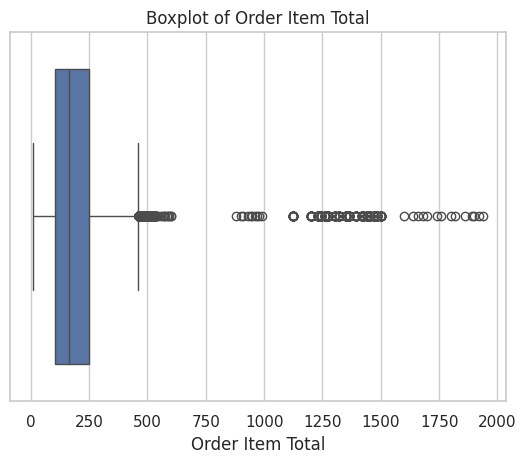

Column: Order Profit Per Order | Outliers: 18942


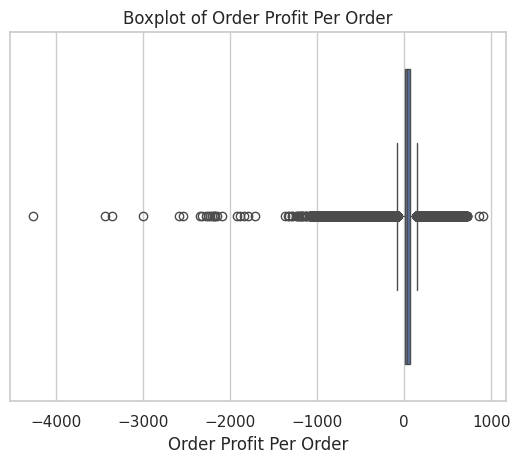

In [21]:
cols_to_check = ['Benefit per order', 'Sales per customer', 'Order Item Total', 'Order Profit Per Order']
for col in cols_to_check:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'Column: {col} | Outliers: {outliers.shape[0]}')

    # Then plot the boxplot as in your code
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

***
> - **Benefit per order:** Nearly 19,000 orders are very different from most others in terms of profit or loss. These could be big wins, mistakes, or special situations.
- **Sales per customer:** Roughly 2,000 customers have spent a lot more or less than usual. These could be major clients or people who only bought once.
- **Order Item Total:** About 2,000 order items are either much more or much less expensive than normal.
- **Order Profit Per Order:** Nearly 19,000 orders stand out for making way more or way less profit, and need extra attention.
***

## What’s Next?
- The data mostly looks good, but a few columns aren’t useful or have the wrong data type.
- We should drop columns that are always empty or always the same.
- We’ll fix date columns to work better for time analysis.
- We need to pay extra attention to outliers—they might be real, or might be errors.
***